# Mapping examples
Here are a few examples of cartographic mapping using Google Colab and some Python libraries.

# MatPlotLib and Basemap
MatPlotLib is an extremely capable and versatile graphics program, that can be adapted to display cartographic maps using the base map library. Here is a simple example that locate MKU on a map of the UK.

In [17]:
%%capture
# basemap itself is not installed by default and needs to be added - see https://matplotlib.org/basemap/
!pip install basemap

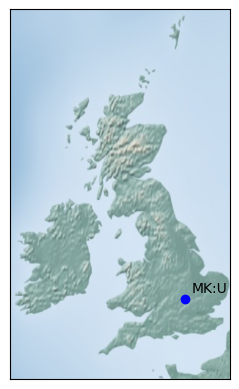

In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# see https://matplotlib.org/basemap/stable/users/mapcoords.html

fig, ax = plt.subplots()
map = Basemap(projection='merc', lat_0 =  53.866772, lon_0 = -5.23636,
              resolution = 'i', area_thresh = 0.05,
              llcrnrlon=-10.65073, llcrnrlat=49.16209,
              urcrnrlon=1.76334, urcrnrlat=61)
map.drawcoastlines(linewidth = 0.2, zorder = 0)
map.shadedrelief()
lon, lat = -0.76,52.04
xpt,ypt = map(lon,lat)
lonpt, latpt = map(xpt,ypt,inverse=True)
map.plot(xpt,ypt,'bo')
plt.text(xpt+40000,ypt+40000,"MK:U")
plt.show()

# Mapping in GeoPandas

For more comprehensive mapping options, we can use the packages GeoPandas.

Alongside static plots, `geopandas` can create interactive maps based on the [folium](https://python-visualization.github.io/folium/) library.

Creating maps for interactive exploration mirrors the API of static [plots](../reference/api/geopandas.GeoDataFrame.plot.html) in an [explore()](../reference/api/geopandas.GeoDataFrame.explore.html) method of a GeoSeries or GeoDataFrame.

Loading some example data:

This example is based on https://github.com/geopandas/geopandas/blob/main/doc/source/docs/user_guide/interactive_mapping.ipynb

In [21]:
%%capture
# mapclassify and geodatasets are not installed by default and needs to be added - see https://pysal.org/mapclassify/ and https://github.com/geopandas/geodatasets
!pip install mapclassify
!pip install geodatasets

In [22]:
import geopandas
import geodatasets

nybb = geopandas.read_file(geodatasets.get_path("nybb"))
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries")).explode(ignore_index=True)

Extracting 'nybb_16a/nybb.shp' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'chicago_commpop/chicago_commpop.geojson' from '/root/.cache/geodatasets/chicago_commpop.zip' to '/root/.cache/geodatasets/chicago_commpop.zip.unzip'
Extracting 'grocery/chicago_sup.shp' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.dbf' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.shx' from '/root/.cache/geodatasets/grocery.zip' 

The simplest option is to use `GeoDataFrame.explore()`:

In [23]:
nybb.explore()

Output hidden; open in https://colab.research.google.com to view.

Interactive plotting offers largely the same customisation as static one plus some features on top of that. Check the code below which plots a customised choropleth map. You can use `"BoroName"` column with NY boroughs names as an input of the choropleth, show (only) its name in the tooltip on hover but show all values on click. You can also pass custom background tiles (either a name supported by folium, a name recognized by `xyzservices.providers.query_name()`, XYZ URL or `xyzservices.TileProvider` object), specify colormap (all supported by `matplotlib`) and specify black outline.

<div class="alert alert-info">
Note

Note that the GeoDataFrame needs to have a CRS set if you want to use background tiles.
</div>

In [24]:
nybb.explore(
    column="BoroName",  # make choropleth based on "BoroName" column
    tooltip="BoroName",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)

Output hidden; open in https://colab.research.google.com to view.

The `explore()` method returns a `folium.Map` object, which can also be passed directly (as you do with `ax` in `plot()`). You can then use folium functionality directly on the resulting map. In the example below, you can plot two GeoDataFrames on the same map and add layer control using folium. You can also add additional tiles allowing you to change the background directly in the map.

In [25]:
import folium

m = chicago.explore(
    column="POP2010",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["POP2010", "POP2000"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="chicago",  # name of the layer in the map
)

groceries.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip="Address",  # show "name" column in the tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="groceries",  # name of the layer in the map
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m  # show map

Output hidden; open in https://colab.research.google.com to view.